In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
pd.pandas.set_option('display.max_columns',None)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
df=pd.read_csv(r"C:\Users\abhisv.CORP\3D Objects\HR analytics\train_LZdllcl.csv")

In [3]:
df.shape

(54808, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
df['education1']=df['education'].str.extract(r'(\bMaster)')
df['education2']=df['education'].str.extract(r'(\bBachelor)')

In [7]:
df.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education1,education2
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,Master,NaN
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,NaN,Bachelor
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,NaN,Bachelor


In [8]:
df.drop('education',axis=1,inplace=True)

In [9]:
df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [10]:
df.drop('employee_id',axis=1,inplace=True)

In [11]:
features_with_na_cat=[features for features in df.columns if df[features].isnull().sum()>1 and df[features].dtypes=='O']
features_with_na_cat

['education1', 'education2']

In [12]:
features_with_na_num=[features for features in df.columns if df[features].isnull().sum()>1 and df[features].dtypes!='O']
features_with_na_num

['previous_year_rating']

In [13]:
features_with_na=pd.DataFrame(pd.concat([df[features_with_na_num],df[features_with_na_cat]]))

In [14]:
for feature in features_with_na:
    print(feature, (df[feature].isnull().sum()/df.shape[0]*100), '% missing values')

education1 72.76857393081302 % missing values
education2 33.0955334987593 % missing values
previous_year_rating 7.524448985549554 % missing values


In [15]:
df['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [16]:
numerical_features=[features for features in df.columns if df[features].dtypes!='O']
print('Number of numerical features', len(numerical_features))

df[numerical_features].head()

Number of numerical features 8


,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,35,5.0,8,1,0,49,0
1,1,30,5.0,4,0,0,60,0
2,1,34,3.0,7,0,0,50,0
3,2,39,1.0,10,0,0,50,0
4,1,45,3.0,2,0,0,73,0


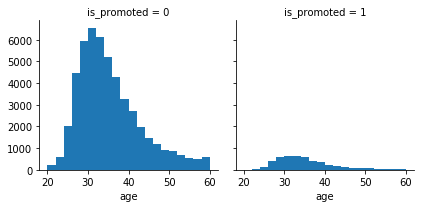

In [17]:
g=sns.FacetGrid(df,col='is_promoted')
g.map(plt.hist,'age',bins=20)

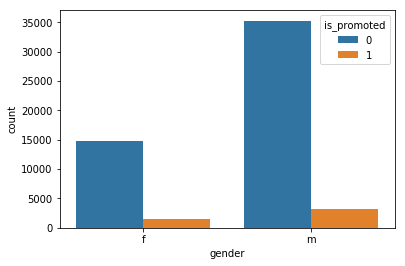

In [18]:
sns.countplot(df['gender'],hue=df['is_promoted'])

(array([  870.,  7031., 13751., 12531.,  8300.,  5093.,  2861.,  1908.,
         1322.,  1141.]),
 array([20., 24., 28., 32., 36., 40., 44., 48., 52., 56., 60.]),
 <a list of 10 Patch objects>)

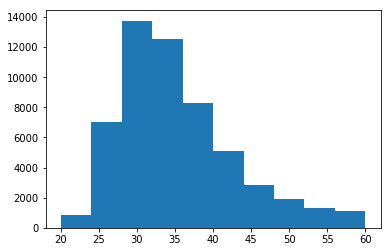

In [19]:
plt.hist(df['age'])## Most of the employees are in the age of 25 to 45.

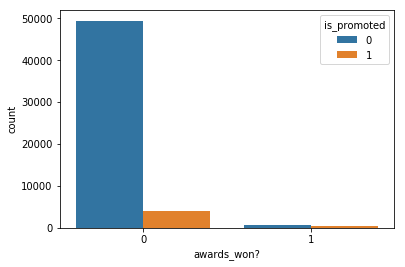

In [20]:
sns.countplot(df['awards_won?'],hue=df['is_promoted']) # The people who are not promoted have won more awards compared to people who are not promoted.

In [21]:
df.head()

,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education1,education2
0,Sales & Marketing,region_7,f,sourcing,1,35,5.0,8,1,0,49,0,Master,NaN
1,Operations,region_22,m,other,1,30,5.0,4,0,0,60,0,NaN,Bachelor
2,Sales & Marketing,region_19,m,sourcing,1,34,3.0,7,0,0,50,0,NaN,Bachelor
3,Sales & Marketing,region_23,m,other,2,39,1.0,10,0,0,50,0,NaN,Bachelor
4,Technology,region_26,m,other,1,45,3.0,2,0,0,73,0,NaN,Bachelor


In [22]:
cat_features=[features for features in df.columns if df[features].dtypes=='O']
print('Number of cat features', len(cat_features))

df[cat_features].head()

Number of cat features 6


,department,region,gender,recruitment_channel,education1,education2
0,Sales & Marketing,region_7,f,sourcing,Master,NaN
1,Operations,region_22,m,other,NaN,Bachelor
2,Sales & Marketing,region_19,m,sourcing,NaN,Bachelor
3,Sales & Marketing,region_23,m,other,NaN,Bachelor
4,Technology,region_26,m,other,NaN,Bachelor


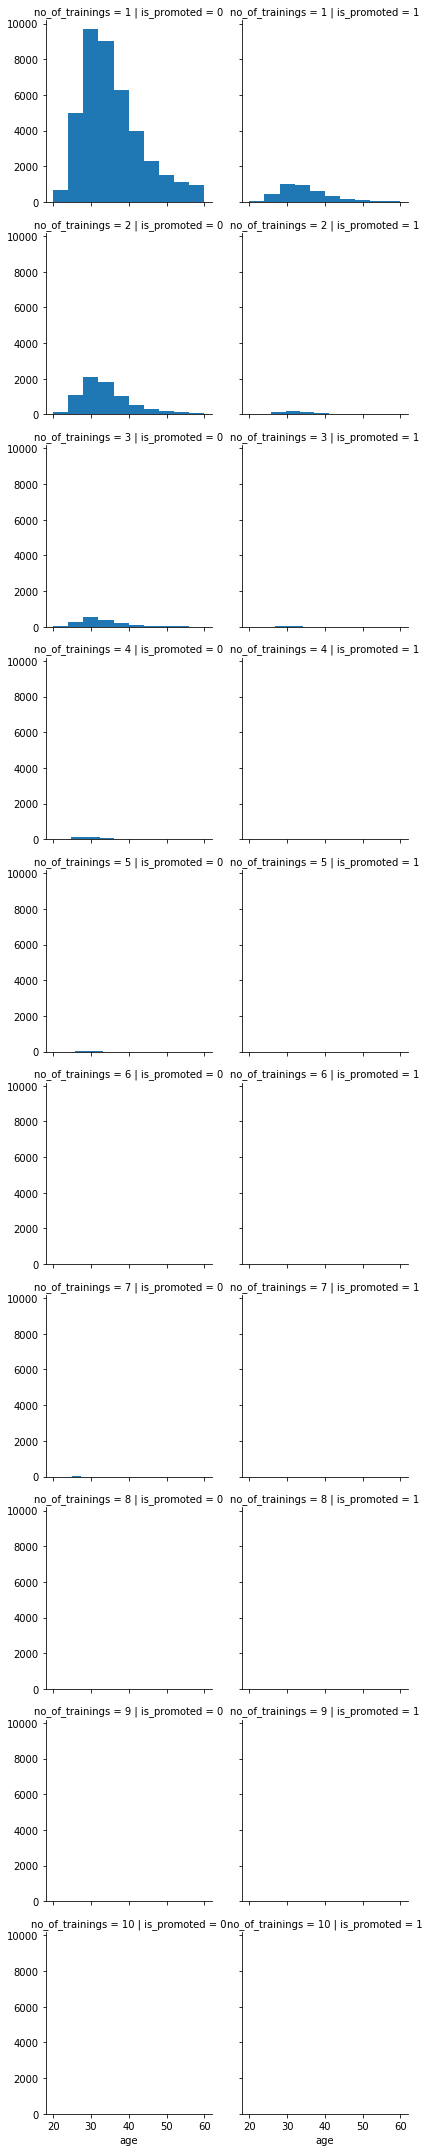

In [23]:
a=sns.FacetGrid(df,row='no_of_trainings',col='is_promoted')
a.map(plt.hist,'age')

In [24]:
# Lets replace missing values with a new label 'Missing'

In [25]:
def replacecatmissing(df,features_with_na_cat):
    for feature in features_with_na_cat:
        print(feature)
        data=df.copy()
        data[features_with_na_cat]=data[features_with_na_cat].fillna('Missing')
    return data

df=replacecatmissing(df,features_with_na_cat)

df.isna().sum()

education1
education2


department                 0
region                     0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
education1                 0
education2                 0
dtype: int64

In [26]:
def replacenummissing(df,features_with_na_num):
    for feature in features_with_na_num:
        print(feature)
        df[features_with_na_num]=df[features_with_na_num].fillna('3')
    return df

df=replacenummissing(df,features_with_na_num)

df.isna().sum()

previous_year_rating


department              0
region                  0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
education1              0
education2              0
dtype: int64

In [27]:
cat_features

['department',
 'region',
 'gender',
 'recruitment_channel',
 'education1',
 'education2']

In [28]:
df[cat_features].head(3)

,department,region,gender,recruitment_channel,education1,education2
0,Sales & Marketing,region_7,f,sourcing,Master,Missing
1,Operations,region_22,m,other,Missing,Bachelor
2,Sales & Marketing,region_19,m,sourcing,Missing,Bachelor


In [29]:
df.head(3)

,department,region,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,education1,education2
0,Sales & Marketing,region_7,f,sourcing,1,35,5,8,1,0,49,0,Master,Missing
1,Operations,region_22,m,other,1,30,5,4,0,0,60,0,Missing,Bachelor
2,Sales & Marketing,region_19,m,sourcing,1,34,3,7,0,0,50,0,Missing,Bachelor


In [31]:
df.shape

(54808, 14)

In [32]:
df.drop(cat_features,axis=1,inplace=True)

In [33]:
df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,35,5,8,1,0,49,0
1,1,30,5,4,0,0,60,0
2,1,34,3,7,0,0,50,0
3,2,39,1,10,0,0,50,0
4,1,45,3,2,0,0,73,0


In [34]:
y=pd.DataFrame(df['is_promoted'])
df.drop('is_promoted',axis=1,inplace=True)

In [35]:
x=df

In [36]:
bestfeatures=SelectKBest(score_func=chi2,k='all') #select k best is used to get top score columns
fit=bestfeatures.fit(x,y)

In [37]:
dfscores=pd.DataFrame(fit.scores_)
dfcolumns=pd.DataFrame(x.columns)

In [38]:
featurescore=pd.concat([dfscores,dfcolumns],axis=1)
featurescore.columns=['scores','specs']

In [39]:
featurescore

,scores,specs
0,10.063491,no_of_trainings
1,27.228103,age
2,574.656810,previous_year_rating
3,19.351084,length_of_service
4,1743.827117,KPIs_met >80%
5,2054.009313,awards_won?
6,5072.973743,avg_training_score


In [40]:
print(featurescore.nlargest(10,'scores'))

        scores                 specs
6  5072.973743    avg_training_score
5  2054.009313           awards_won?
4  1743.827117         KPIs_met >80%
2   574.656810  previous_year_rating
1    27.228103                   age
3    19.351084     length_of_service
0    10.063491       no_of_trainings


In [41]:
x=x[['avg_training_score','awards_won?','previous_year_rating','KPIs_met >80%','age','length_of_service','no_of_trainings']]

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold,cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import RandomizedSearchCV
lr=LogisticRegression()
rfc=RandomForestClassifier(n_jobs=3, n_estimators=15, min_samples_split=4)
dtc=DecisionTreeClassifier()
svc=SVC()

In [43]:
skf=StratifiedKFold(5,shuffle=True,random_state=1)
print(cross_val_score(rfc,x,y,cv=skf,scoring='accuracy').mean())

0.9141183830329359


In [44]:
rfc.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=3,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [45]:
rfc.predict(x)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
score=accuracy_score(y,rfc.predict(x))
score

0.9563384907312801

In [47]:
params={'n_jobs':[-1,1,2,3,4,5],'n_estimators':[5,10,15],'min_samples_split':[2,4,3]}
rscv=RandomizedSearchCV(estimator=rfc,param_distributions=params,cv=5,scoring='accuracy')
rscv=rscv.fit(x,y)

In [48]:
rscv.best_params_

{'n_jobs': 3, 'n_estimators': 15, 'min_samples_split': 4}

In [49]:
test_df=pd.read_csv(r"C:\Users\abhisv.CORP\3D Objects\HR analytics\test_2umaH9m.csv")

In [50]:
test_df.shape

(23490, 13)

In [51]:
test_df.isna().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [52]:
test_df['education1']=test_df['education'].str.extract(r'(\bMaster)')
test_df['education2']=test_df['education'].str.extract(r'(\bBachelor)')

In [53]:
test_df=replacecatmissing(test_df,features_with_na_cat)

education1
education2


In [54]:
test_df=replacenummissing(test_df,features_with_na_num)

previous_year_rating


In [55]:
test_df.drop('education',axis=1,inplace=True)

In [56]:
test_df=label_encoder(test_df,cat_features)

NameError: name 'label_encoder' is not defined

In [ ]:
test_df.shape

In [ ]:
test_df=test_df[['avg_training_score','awards_won?','previous_year_rating','KPIs_met >80%','age','length_of_service','no_of_trainings']]

In [ ]:
test_predict=pd.DataFrame(rfc.predict(test_df))

In [ ]:
test_predict.rename(columns={0:'is_promoted'},inplace=True)

In [ ]:
test_predict.to_csv('sample submission.csv')